In [9]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'; 
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn import metrics as skmetrics
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.utils.vis_utils import plot_model
import h5py
from tables import *
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
loadedmodel = load_model("/Users/madda/Desktop/Maddalena/POLITECNICO/SECONDO ANNO/LAB/PROGETTO/AY2223_I_Project-3/PYTHON/model/sequential_26.h5", compile=False)


In [11]:
train_filename='dataset_test.csv'
df_test=pd.read_csv(train_filename, nrows=3117, header=0,comment='#', na_values=[""])


In [12]:
X_test = df_test.drop(['target'], axis = 1).values
y_test = df_test['target'].values


In [13]:
y_pred=loadedmodel.predict(X_test)
y_pred=np.argmax(y_pred,axis=-1)

print(y_pred)

98/98 [==============================] - 0s 2ms/step
[0 0 0 ... 1 1 1]


In [14]:
CM=confusion_matrix(y_test,y_pred)

In [15]:
cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred),
                     index = ['0','1','2'], 
                     columns =['0','1','2'])

Text(33.22222222222222, 0.5, 'Actal\xa0Values')

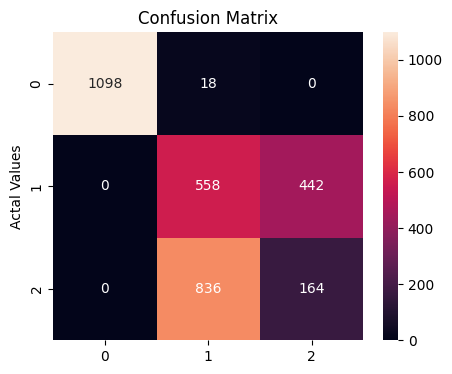

In [16]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4),)
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')